In [0]:
%matplotlib inline
import pandas as pd


<img src="https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/header.png" alt="drawing"/>


A multi-channel electroencephalography (EEG) system enables a broad range of applications including neurotherapy, biofeedback, and brain computer interfacing. The dataset you will analyse is created with the [Emotiv EPOC+](https://www.emotiv.com/product/emotiv-epoc-14-channel-mobile-eeg).  

It has 14 EEG channels with names based on the International 10-20 locations: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4:

<br/>
<br/>
<center>
<img src="https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/EEG.png" alt="drawing" width="200"/>
<center/>
<br/>
<br/>


All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. 

The experiment was conducted on one person only. The duration of the measurement was around 117 seconds.

From the paper:

> *The experiment was carried out in a quiet room. During
the experiment, the proband was being videotaped. To prevent
artifacts, the proband was not aware of the exact start time
of the measurement. Instead, he was told to sit relaxed, look
straight to the camera, and change the eye state at free will.
Only additional constraint was that, accumulated over the
entire session, the duration of both eye states should be about
the same and that the individual intervals should vary greatly
in length (from eye blinking to longer stretches)...*

The eye state was detected via a camera during the EEG measurement and later added manually to the file after analyzing the video frames. 

A label '1' indicates the eye-closed and '0' the eye-open state.

(*Source: Oliver Roesler, Stuttgart, Germany*)

Let's load the train and test set:

In [0]:
trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")

testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

sample_submission = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/sample_submission.csv")


You will fit a model on the trainset and make predictions on the testset. 

To submit these predictions to Kaggle you need to write a .csv file with two columns: 
- `index` that matches the `index` column in the test set.
- `label` which is your prediction.

Here is an example predictions file for Kaggle:

In [0]:
sample_submission.head(10)

,index,label
0,0,0.168801
1,1,0.124169
2,2,0.947757
3,3,0.069585
4,4,0.635325
5,5,0.659027
6,6,0.653697
7,7,0.850030
8,8,0.160489
9,9,0.843272


Make sure to save your results without the extra Pandas index column that is written by default:

In [4]:
trainset.head(10)

,AF3,F7,F3,FC5,T7,P7,O1,02,P8,T8,FC6,F4,F8,AF4,label
0,4299.49,3997.44,4277.95,4116.92,4353.85,4623.08,4100.00,4623.59,4202.56,4229.23,4211.79,4278.97,4600.00,4369.23,1
1,4302.05,3985.64,4261.03,4129.74,4334.36,4615.38,4072.31,4585.64,4192.31,4225.13,4195.90,4283.08,4607.18,4358.46,0
2,4321.03,4015.90,4265.13,4122.56,4333.33,4613.33,4072.82,4602.05,4192.31,4223.08,4155.38,4286.15,4608.21,4371.79,0
3,4408.21,4104.10,4380.00,4232.31,4449.74,4750.26,4169.23,4731.28,4311.28,4352.31,4319.49,4388.21,4715.90,4464.10,0
4,4347.18,3975.38,4266.67,4102.56,4333.33,4617.95,4097.44,4612.82,4210.77,4240.51,4248.21,4313.33,4664.10,4411.79,1
5,4292.82,4007.18,4275.38,4120.00,4336.92,4620.51,4059.49,4614.36,4194.87,4229.23,4158.46,4270.26,4600.51,4353.33,0
6,4295.90,4017.44,4261.54,4120.00,4343.59,4636.41,4063.08,4620.00,4203.08,4225.13,4195.90,4271.28,4591.79,4350.77,0
7,4317.44,3981.03,4283.59,4121.03,4351.28,4635.38,4091.28,4633.85,4210.77,4257.44,4234.87,4295.90,4658.97,4407.18,1
8,4306.67,4017.44,4249.23,4135.38,4339.49,4631.28,4081.54,4609.23,4202.56,4245.13,4194.87,4274.87,4596.41,4375.90,0
9,4309.23,4019.49,4282.05,4119.49,4352.82,4627.18,4088.21,4625.64,4217.95,4253.85,4225.64,4296.41,4621.54,4383.08,0


<Figure size 864x576 with 0 Axes>

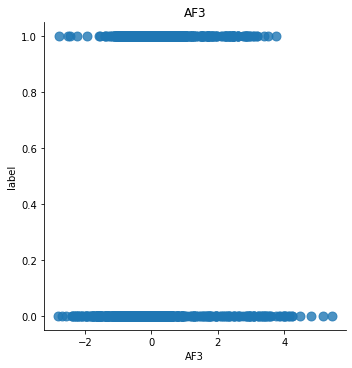

<Figure size 864x576 with 0 Axes>

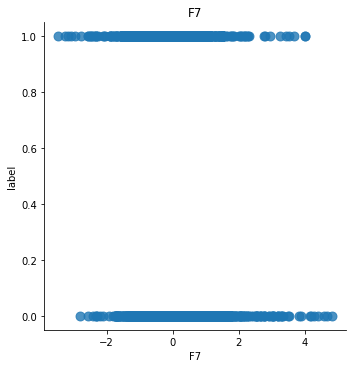

<Figure size 864x576 with 0 Axes>

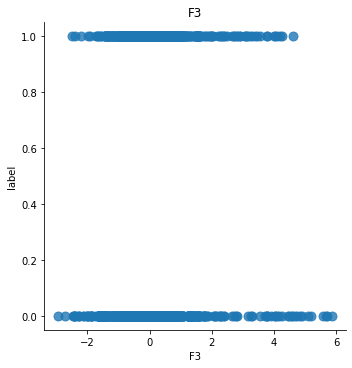

<Figure size 864x576 with 0 Axes>

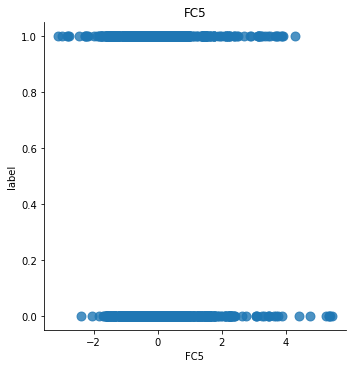

<Figure size 864x576 with 0 Axes>

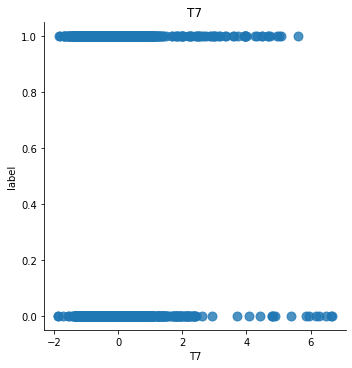

<Figure size 864x576 with 0 Axes>

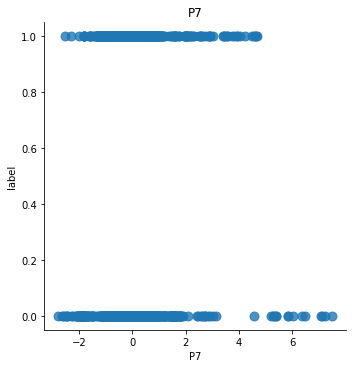

<Figure size 864x576 with 0 Axes>

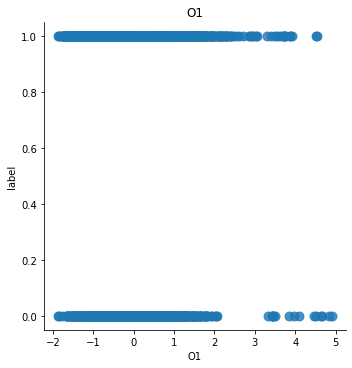

<Figure size 864x576 with 0 Axes>

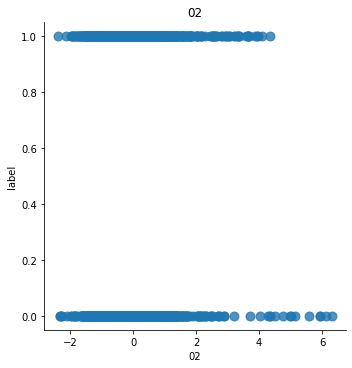

<Figure size 864x576 with 0 Axes>

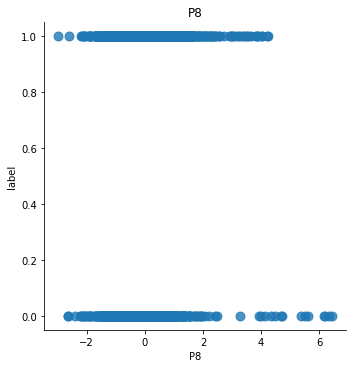

<Figure size 864x576 with 0 Axes>

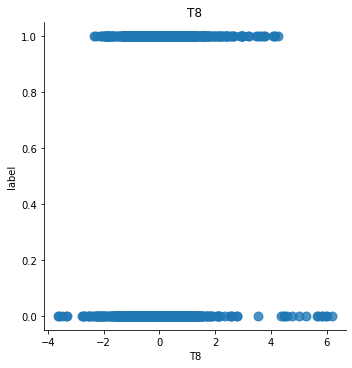

<Figure size 864x576 with 0 Axes>

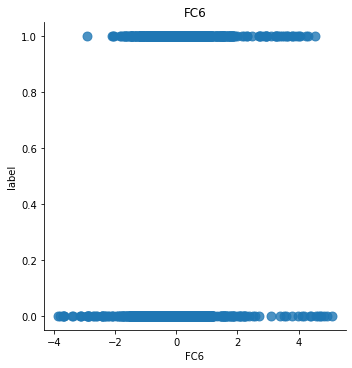

<Figure size 864x576 with 0 Axes>

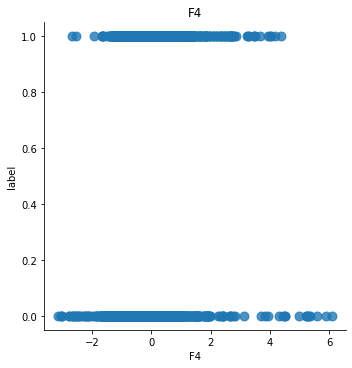

<Figure size 864x576 with 0 Axes>

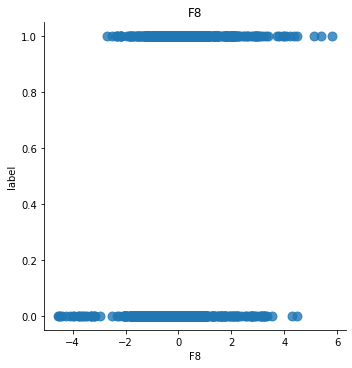

<Figure size 864x576 with 0 Axes>

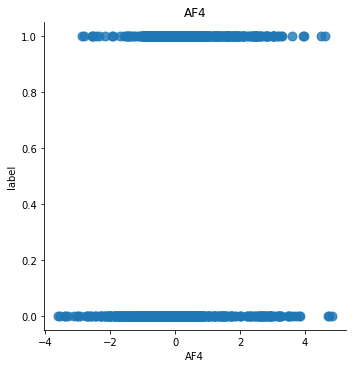

In [16]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
traincopy = trainset.copy()

scaled_train = pd.DataFrame()
scaled_train['label'] = traincopy['label'] 

for x in trainset.columns[:-1]:
  feature_scaler = StandardScaler()
  feature_scaler.fit(trainset[[x]])
  scaled_train[x] = feature_scaler.transform(traincopy[[x]])
  
  plt.figure(figsize=(12,8))
  sns.lmplot(x=x, y='label', data=scaled_train, fit_reg=False, scatter_kws={'s':80}, legend=True)
  plt.title(x)
  plt.show()


In [0]:
filename = "my_prediction_results.csv"

#make sure to not write the Pandas index column (index=False)
sample_submission.to_csv(filename,index=False)